In [7]:
import numpy as np

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import statistics


The ROC curve represents the performance of a binary model such as confusion matrixes 
Using FPR (False positive rate) and TPR (True positive rates) Crossing X ans Y.

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [8]:
df = pd.read_csv('HR_comma_sep.csv')

In [9]:
df.sample(19)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
4545,0.82,0.89,4,196,3,0,0,1,technical,medium
9060,0.80,0.84,3,186,6,0,0,0,support,low
3150,0.88,0.74,5,245,2,0,0,0,sales,medium
6208,0.83,0.69,4,233,2,0,0,0,sales,medium
3727,0.81,0.52,3,255,5,0,0,0,IT,medium
6708,0.79,0.97,6,113,2,1,0,0,product_mng,medium
10512,0.88,0.71,5,255,3,0,0,0,support,medium
14352,0.45,0.53,2,155,3,0,1,0,IT,low
6760,0.94,0.60,5,278,2,0,0,0,technical,low
12753,0.43,0.52,2,150,3,0,1,0,product_mng,low


In [11]:
train_cols=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
X=df[train_cols]
y=df['left']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:

clf=LogisticRegression(C=1e10)

In [15]:
clf.fit(X_train,y_train)

LogisticRegression(C=10000000000.0)

In [16]:
y_pred=clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[3449  320]
 [ 890  291]]


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.7555555555555555


In [21]:
y_test.value_counts(normalize=True)

0    0.761414
1    0.238586
Name: left, dtype: float64

In [22]:
y_test.mean()

0.2385858585858586

In [23]:
1.0 - y_test.mean()

0.7614141414141414

In [24]:
print(1-accuracy_score(y_test,y_pred))

0.24444444444444446


In [25]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))

0.2464013547840813


In [27]:
TP = confusion[1,1]
TN = confusion[0,0]

FP= confusion[0,1]
FN= confusion[1,0]
specificity= TN / (TN + TP)
print(specificity)

0.922192513368984


In [28]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.3247767857142857


In [29]:
pd.Series(y_pred).unique()

array([0, 1], dtype=int64)

In [30]:
pd.Series(y_pred).value_counts()

0    4339
1     611
dtype: int64

In [31]:
y_pred_proba=clf.predict_proba(X_test)

In [32]:
display	(y_pred_proba.shape,y_pred_proba)

(4950, 2)

array([[0.95336765, 0.04663235],
       [0.92996854, 0.07003146],
       [0.85500604, 0.14499396],
       ...,
       [0.90959284, 0.09040716],
       [0.81266312, 0.18733688],
       [0.24847609, 0.75152391]])

In [33]:
pd.Series(y_pred).value_counts()

0    4339
1     611
dtype: int64

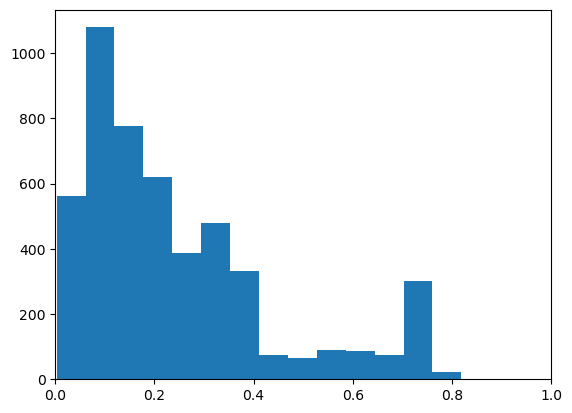

In [34]:
y_probs_logit_left = y_pred_proba[:,1]
plt.hist(y_probs_logit_left,bins=15)
plt.xlim(0,1)
plt.show()

In [35]:
y_pred_logit=(y_probs_logit_left>0.3).astype(int)
y_pred_logit

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
display(confusion_matrix(y_test,y_pred))
display(confusion_matrix(y_test,y_pred_logit))

array([[3449,  320],
       [ 890,  291]], dtype=int64)

array([[3090,  679],
       [ 362,  819]], dtype=int64)

In [37]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_logit))

0.7555555555555555
0.7896969696969697


In [38]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, thr_log = roc_curve(y_test,y_pred_proba[:,1])
df = pd.DataFrame(dict(fpr=fpr_log,tpr=tpr_log))

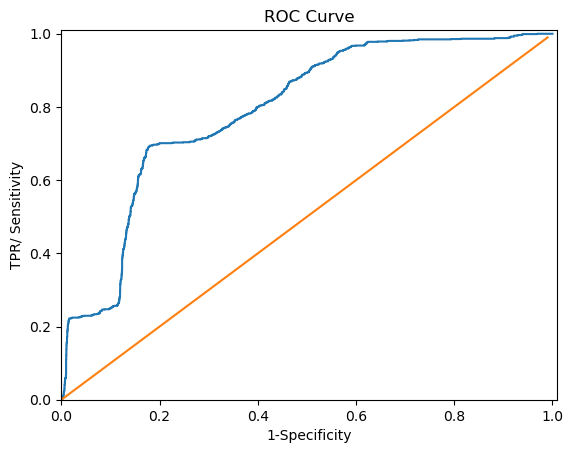

In [39]:
plt.axis([0,1.01,0,1.01])
plt.xlabel('1-Specificity')
plt.ylabel('TPR/ Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1,step=0.01),np.arange(0,1,step=0.01))

In [40]:
from sklearn.metrics import auc
print(auc(fpr_log,tpr_log))


0.7918920090789224
